In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import OnehotTransactions

In [42]:
dataset = pd.read_excel('Online Retail.xlsx')
dataset.head(1500)#limitei os registros por causa do processamento do notebook

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [43]:
#calculos extras através das colunas do dataset
dataset['TotalAmount'] = dataset['Quantity'] * dataset['UnitPrice']
dataset['InvoiceYear'] = dataset['InvoiceDate'].dt.year
dataset['InvoiceMonth'] = dataset['InvoiceDate'].dt.month
dataset['InvoiceYearMonth'] = dataset['InvoiceYear'].map(str) + "-" + dataset['InvoiceMonth'].map(str)

In [44]:
# Itens vendidos 
gp_stockcode = dataset.groupby('Description')
gp_stockcode_frq_quantitiy = gp_stockcode['Quantity'].agg(np.sum).sort_values(ascending=False)
gp_stockcode_frq_quantitiy.head(20)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
VICTORIAN GLASS HANGING T-LIGHT       23854
ASSORTED COLOURS SILK FAN             23082
BROCADE RING PURSE                    23053
RED  HARMONICA IN BOX                 21866
JUMBO BAG PINK POLKADOT               21009
SMALL POPCORN HOLDER                  20116
PAPER CHAIN KIT 50'S CHRISTMAS        18902
LUNCH BAG RED RETROSPOT               18779
60 TEATIME FAIRY CAKE CASES           18040
PARTY BUNTING                         18022
Name: Quantity, dtype: int64

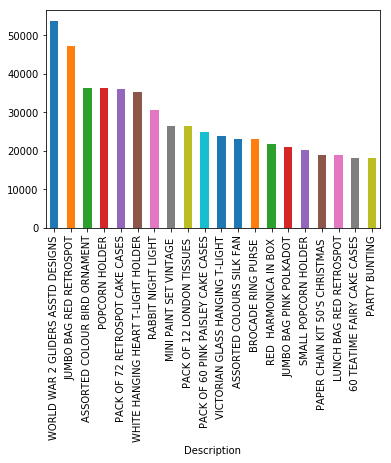

In [45]:
gp_stockcode_frq_quantitiy.head(20).plot.bar()

In [46]:
####################### Países ###############
gp_country = dataset.groupby('Country')
# ordena os paises pelo total de compra by total amount
gp_country['TotalAmount'].agg(np.sum).sort_values(ascending=False)

Country
United Kingdom          8.187806e+06
Netherlands             2.846615e+05
EIRE                    2.632768e+05
Germany                 2.216982e+05
France                  1.974039e+05
Australia               1.370773e+05
Switzerland             5.638535e+04
Spain                   5.477458e+04
Belgium                 4.091096e+04
Sweden                  3.659591e+04
Japan                   3.534062e+04
Norway                  3.516346e+04
Portugal                2.936702e+04
Finland                 2.232674e+04
Channel Islands         2.008629e+04
Denmark                 1.876814e+04
Italy                   1.689051e+04
Cyprus                  1.294629e+04
Austria                 1.015432e+04
Hong Kong               1.011704e+04
Singapore               9.120390e+03
Israel                  7.907820e+03
Poland                  7.213140e+03
Unspecified             4.749790e+03
Greece                  4.710520e+03
Iceland                 4.310000e+03
Canada                  3.6663

In [47]:
# ordenar os países por número de clientes
gp_country['CustomerID'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          3951
Germany                   95
France                    88
Spain                     31
Belgium                   25
Switzerland               22
Portugal                  20
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Unspecified                5
Israel                     5
Greece                     4
USA                        4
EIRE                       4
Canada                     4
Bahrain                    3
United Arab Emirates       2
Malta                      2
Singapore                  1
Brazil                     1
Iceland                    1
Saudi Arabia               1
Hong Kong                  1
RSA                        1
Europe

In [48]:
# Explorar mais informações sobre o país italia
uk_customers_amounts = dataset[dataset['Country']=='Italy'].groupby('CustomerID')['TotalAmount'].agg(np.sum).sort_values(ascending=False)
uk_customers_amounts.head(20)

CustomerID
12594.0    3320.22
12578.0    2753.36
12610.0    2057.99
12584.0    1893.95
12349.0    1757.55
12611.0    1193.32
12514.0    1017.68
14912.0     841.52
12591.0     452.85
12552.0     437.82
12725.0     427.80
12515.0     383.70
12586.0     179.94
12618.0     177.31
12505.0      -4.50
Name: TotalAmount, dtype: float64

In [49]:
# itens mais vendidos da italia
uk_gp_stockcode = dataset[dataset['Country']=='Italy'].groupby('Description')
uk_gp_stockcode_frq_quantitiy = uk_gp_stockcode['Quantity'].agg(np.sum).sort_values(ascending=False)
uk_gp_stockcode_frq_quantitiy.head(20)

Description
FEATHER PEN,HOT PINK                   240
ICE CREAM BUBBLES                      200
FEATHER PEN,COAL BLACK                 168
FEATHER PEN,LIGHT PINK                 120
POPCORN HOLDER                         112
BIG DOUGHNUT FRIDGE MAGNETS             96
SCOTTIE DOGS BABY BIB                   96
SET/4 DAISY MIRROR MAGNETS              72
RABBIT NIGHT LIGHT                      72
PLASTERS IN TIN CIRCUS PARADE           72
PHOTO CLIP LINE                         72
FAIRY TALE COTTAGE NIGHTLIGHT           72
LUNCH BAG CARS BLUE                     70
LUNCH BAG WOODLAND                      70
JUMBO STORAGE BAG SUKI                  60
MIRRORED WALL ART STARS                 60
ROUND SNACK BOXES SET OF4 WOODLAND      60
PLASTERS IN TIN WOODLAND ANIMALS        60
PLASTERS IN TIN SKULLS                  60
GINGERBREAD MAN COOKIE CUTTER           60
Name: Quantity, dtype: int64

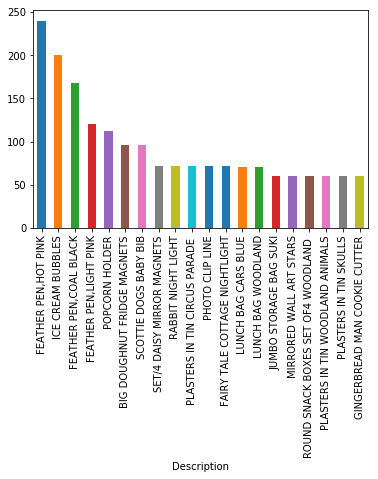

In [50]:
uk_gp_stockcode_frq_quantitiy.head(20).plot.bar()

In [51]:
## Retiramos algumas das descrições com espaços,linhas que não têm números de fatura e removeremos as transações de crédito.
dataset['Description'] = dataset['Description'].str.strip()
dataset.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
dataset['InvoiceNo'] = dataset['InvoiceNo'].astype('str')
dataset = dataset[~dataset['InvoiceNo'].str.contains('C')]

In [78]:
#consolidar os itens em uma transação país exemplo Italy
basket = (dataset[dataset['Country'] =="Italy"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket.head()

Description,12 EGG HOUSE PAINTED WOOD,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 GARDENIA MORRIS BOXED CANDLES,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,...,WOODLAND BUNNIES LOLLY MAKERS,WOODLAND CHARLOTTE BAG,WRAP DOILEY DESIGN,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP RED APPLES,WRAP RED VINTAGE DOILY,YOU'RE CONFUSING ME METAL SIGN,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
537022,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# transformar valores e retirar a coluna'POSTAGE'
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [72]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [73]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG TOYS),(CHILDRENS APRON APPLES DESIGN),0.078947,0.157895,0.078947,1.0,6.333333,0.066482,inf
1,(CHILDRENS APRON APPLES DESIGN),(JUMBO BAG TOYS),0.157895,0.078947,0.078947,0.5,6.333333,0.066482,1.842105
2,"(JUMBO BAG TOYS, TOY TIDY SPACEBOY, RECYCLING ...",(CHILDRENS APRON APPLES DESIGN),0.078947,0.157895,0.078947,1.0,6.333333,0.066482,inf
3,"(JUMBO BAG TOYS, TOY TIDY SPACEBOY, CHILDRENS ...",(RECYCLING BAG RETROSPOT),0.078947,0.157895,0.078947,1.0,6.333333,0.066482,inf
4,"(JUMBO BAG TOYS, RECYCLING BAG RETROSPOT, CHIL...",(TOY TIDY SPACEBOY),0.078947,0.131579,0.078947,1.0,7.600000,0.068560,inf


In [74]:
rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG TOYS),(CHILDRENS APRON APPLES DESIGN),0.078947,0.157895,0.078947,1.0,6.333333,0.066482,inf
2,"(JUMBO BAG TOYS, TOY TIDY SPACEBOY, RECYCLING ...",(CHILDRENS APRON APPLES DESIGN),0.078947,0.157895,0.078947,1.0,6.333333,0.066482,inf
3,"(JUMBO BAG TOYS, TOY TIDY SPACEBOY, CHILDRENS ...",(RECYCLING BAG RETROSPOT),0.078947,0.157895,0.078947,1.0,6.333333,0.066482,inf
4,"(JUMBO BAG TOYS, RECYCLING BAG RETROSPOT, CHIL...",(TOY TIDY SPACEBOY),0.078947,0.131579,0.078947,1.0,7.600000,0.068560,inf
5,"(TOY TIDY SPACEBOY, RECYCLING BAG RETROSPOT, C...",(JUMBO BAG TOYS),0.078947,0.078947,0.078947,1.0,12.666667,0.072715,inf
6,"(JUMBO BAG TOYS, TOY TIDY SPACEBOY)","(RECYCLING BAG RETROSPOT, CHILDRENS APRON APPL...",0.078947,0.078947,0.078947,1.0,12.666667,0.072715,inf
7,"(JUMBO BAG TOYS, RECYCLING BAG RETROSPOT)","(TOY TIDY SPACEBOY, CHILDRENS APRON APPLES DES...",0.078947,0.105263,0.078947,1.0,9.500000,0.070637,inf
8,"(JUMBO BAG TOYS, CHILDRENS APRON APPLES DESIGN)","(TOY TIDY SPACEBOY, RECYCLING BAG RETROSPOT)",0.078947,0.105263,0.078947,1.0,9.500000,0.070637,inf
11,"(RECYCLING BAG RETROSPOT, CHILDRENS APRON APPL...","(JUMBO BAG TOYS, TOY TIDY SPACEBOY)",0.078947,0.078947,0.078947,1.0,12.666667,0.072715,inf
12,(JUMBO BAG TOYS),"(TOY TIDY SPACEBOY, RECYCLING BAG RETROSPOT, C...",0.078947,0.078947,0.078947,1.0,12.666667,0.072715,inf


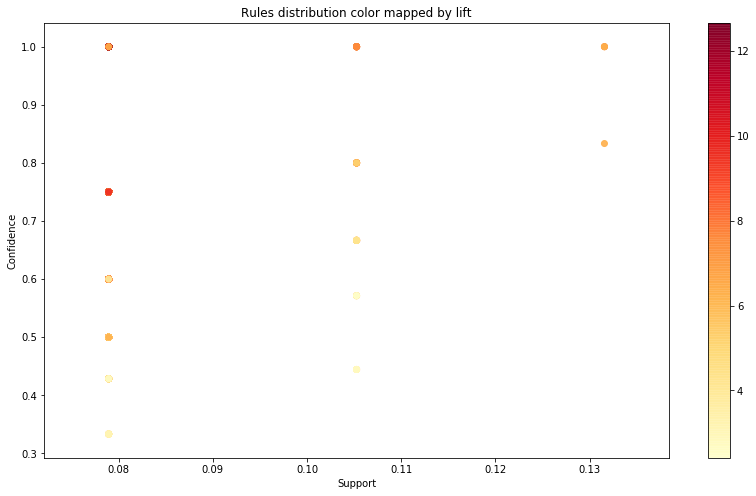

In [80]:
# Grafico Visualizar a distribuição com lift
plt.figure(figsize=(14, 8))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], alpha=0.9, cmap='YlOrRd');
plt.title('Rules distribution color mapped by lift');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

In [69]:
### Exemplo País Germany
basket2 = (dataset[dataset['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules2[ (rules2['lift'] >= 4) &
        (rules2['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
7,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746
10,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984


In [77]:
##########################################